In [28]:
# import libraries and load dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
%matplotlib inline
df = pd.read_csv('nigeria_state_wise.csv')

In [29]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Nigeria,9.082,8.6753,1/22/20,0,0
1,NaN,Nigeria,9.082,8.6753,1/23/20,0,0
2,NaN,Nigeria,9.082,8.6753,1/24/20,0,0
3,NaN,Nigeria,9.082,8.6753,1/25/20,0,0
4,NaN,Nigeria,9.082,8.6753,1/26/20,0,0


In [31]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
73,NaN,Nigeria,9.082,8.6753,4/4/20,214,4
74,NaN,Nigeria,9.082,8.6753,4/5/20,232,5
75,NaN,Nigeria,9.082,8.6753,4/6/20,238,5
76,NaN,Nigeria,9.082,8.6753,4/7/20,254,6
77,NaN,Nigeria,9.082,8.6753,4/8/20,276,6


In [33]:
# summarize data 

df.describe()

,Province/State,Lat,Long,Confirmed,Deaths
count,0.0,7.800000e+01,7.800000e+01,78.000000,78.000000
mean,NaN,9.082000e+00,8.675300e+00,33.679487,0.576923
std,NaN,5.363563e-15,5.363563e-15,71.105280,1.400549
min,NaN,9.082000e+00,8.675300e+00,0.000000,0.000000
25%,NaN,9.082000e+00,8.675300e+00,0.000000,0.000000
50%,NaN,9.082000e+00,8.675300e+00,1.000000,0.000000
75%,NaN,9.082000e+00,8.675300e+00,11.000000,0.000000
max,NaN,9.082000e+00,8.675300e+00,276.000000,6.000000


In [38]:
# drop empty column

df.drop(['Province/State'], axis=1)

,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,Nigeria,9.082,8.6753,1/22/20,0,0
1,Nigeria,9.082,8.6753,1/23/20,0,0
2,Nigeria,9.082,8.6753,1/24/20,0,0
3,Nigeria,9.082,8.6753,1/25/20,0,0
4,Nigeria,9.082,8.6753,1/26/20,0,0
...,...,...,...,...,...,...
73,Nigeria,9.082,8.6753,4/4/20,214,4
74,Nigeria,9.082,8.6753,4/5/20,232,5
75,Nigeria,9.082,8.6753,4/6/20,238,5
76,Nigeria,9.082,8.6753,4/7/20,254,6


In [36]:
cdf = df[['Date','Country/Region','Confirmed','Deaths']]
cdf.head(9)

,Date,Country/Region,Confirmed,Deaths
0,1/22/20,Nigeria,0,0
1,1/23/20,Nigeria,0,0
2,1/24/20,Nigeria,0,0
3,1/25/20,Nigeria,0,0
4,1/26/20,Nigeria,0,0
5,1/27/20,Nigeria,0,0
6,1/28/20,Nigeria,0,0
7,1/29/20,Nigeria,0,0
8,1/30/20,Nigeria,0,0


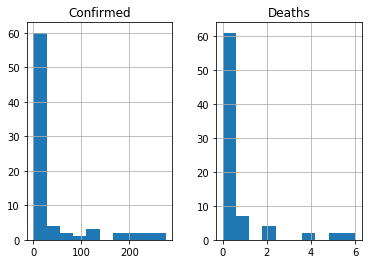

In [37]:
viz = cdf[['Confirmed','Deaths']]
viz.hist()
plt.show()

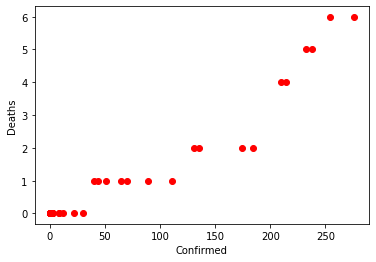

In [45]:
plt.scatter(cdf.Confirmed, cdf.Deaths,  color='red')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [52]:
#Create Train-Test Split

msk = np.random.rand(len(df)) < 0.6
train = cdf[msk]
test = cdf[~msk]

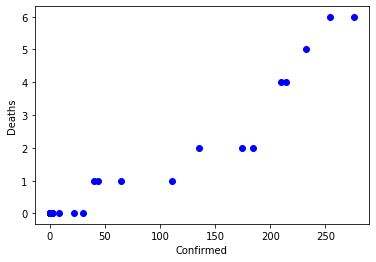

In [53]:
plt.scatter(train.Confirmed, train.Deaths,  color='blue')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()

In [57]:
# ML using LR, import LR library

from sklearn import linear_model
lm = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Confirmed']])
train_y = np.asanyarray(train[['Deaths']])
lm.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[0.01909945]]
Intercept:  [-0.06684323]


Text(0, 0.5, 'Deaths')

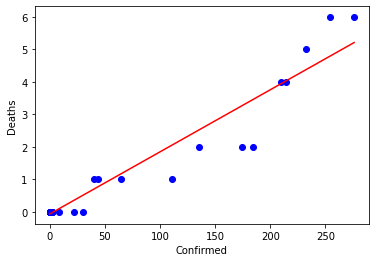

In [58]:
plt.scatter(train.Confirmed, train.Deaths,  color='blue')
plt.plot(train_x, lm.coef_[0][0]*train_x + lm.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")

# Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

 There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

 - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
 - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
 - Root Mean Squared Error (RMSE).
 - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [62]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Confirmed']])
test_y = np.asanyarray(test[['Deaths']])
test_y_ = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.04
R2-score: 0.96
